<h1>READING EXTERNAL DATA & PLOTTING <h1>

<h3>Process:</h3><br>
<ol>1. Import Data</ol>
<ol>2. Organize Data</ol>
<ol>3. Make Corrections</ol>
<ol>4. View Insights
    <ol>.head()</ol>
    <ol>.describe()</ol>
    <ol>.dtypes</ol>
    <ol>.size()</ol>
    <ol>.info()</ol></ol>
<ol>5. Manipulate & Plot Data</ol>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format

Pandas can easily read data stored in different file formats like CSV, JSON, XML, and Excel. <b>Parsing</b> always involves specifying the correct structure, encoding, and other details. The <b>read_csv</b> method reads CSV files and accpets many parameters. 

<b>PRO TIPS:</b><br> 
<u>DESKTOP</u>:     Use the (r') presyntax prior to placing the file path if opening from desktop.<br>
<u>WEB</u>:         If puling from GitHub, use the RAW url

In [23]:
#Import as DataFile without header (don't infer headers)
df = pd.read_csv(r'C:\Users\Work\Desktop\Python Lessons\Data Science\Data Science w Py Course\Data For Use\btc-market-price.csv',header=None)

In [20]:
df.head()

0        1
0  2017-04-02 00:00:00 1,099.17
1  2017-04-03 00:00:00 1,141.81
2  2017-04-04 00:00:00 1,141.60
3  2017-04-05 00:00:00 1,133.08
4  2017-04-06 00:00:00 1,196.31

In [36]:
##Then lets rename the columns...
#df.rename({'2017-04-02 00:00:00':'Timestamp', '1099.169125':'Price'}, axis=1, inplace=True)
df.columns = ['Timestamp', 'Price']

In [37]:
df.head() #Gets first 5 rows by default

Timestamp    Price
0  2017-04-02 00:00:00 1,099.17
1  2017-04-03 00:00:00 1,141.81
2  2017-04-04 00:00:00 1,141.60
3  2017-04-05 00:00:00 1,133.08
4  2017-04-06 00:00:00 1,196.31

In [38]:
df.tail() #Gets last 5 rows by default

Timestamp    Price
360  2018-03-28 00:00:00 7,960.38
361  2018-03-29 00:00:00 7,172.28
362  2018-03-30 00:00:00 6,882.53
363  2018-03-31 00:00:00 6,935.48
364  2018-04-01 00:00:00 6,794.10

In [39]:
df.shape

(365, 2)

In [40]:
df.dtypes

Timestamp     object
Price        float64
dtype: object

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  365 non-null    object 
 1   Price      365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


<b>NOTE:</b>The 'Timestamp' column was imported as an object. However, we want it to be date/time related. We can perform a <u>vectorized operation</u> to parse all the Timestamp values as <b>DateTime</b> objects: 


In [43]:
#Vectoized Operation to return SERIES
pd.to_datetime(df['Timestamp']).head() 

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Timestamp, dtype: datetime64[ns]

In [44]:
#Apply the SERIES to DataFrame
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [45]:
df.head()

Timestamp    Price
0 2017-04-02 1,099.17
1 2017-04-03 1,141.81
2 2017-04-04 1,141.60
3 2017-04-05 1,133.08
4 2017-04-06 1,196.31

In [46]:
df.tail()

Timestamp    Price
360 2018-03-28 7,960.38
361 2018-03-29 7,172.28
362 2018-03-30 6,882.53
363 2018-03-31 6,935.48
364 2018-04-01 6,794.10

In [48]:
df.dtypes

Timestamp    datetime64[ns]
Price               float64
dtype: object

In [49]:
#Now we just set the index to the Timestamp
##Doing this allows us to access the value directly from index...
###Using the 'loc' method

df.set_index('Timestamp', inplace=True)

In [50]:
df.head()

Price
Timestamp          
2017-04-02 1,099.17
2017-04-03 1,141.81
2017-04-04 1,141.60
2017-04-05 1,133.08
2017-04-06 1,196.31

In [51]:
df.loc['2017-09-29']

Price   4,193.57
Name: 2017-09-29 00:00:00, dtype: float64

<h2>Putting Everything Together</h2>
<p>We arrived at our final desired version of the DataFrame. The steps were:</p>

In [52]:
df = pd.read_csv(r'C:\Users\Work\Desktop\Python Lessons\Data Science\Data Science w Py Course\Data For Use\btc-market-price.csv',header=None)
df.columns = ['Timestamp', 'Price']
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

In [53]:
df.head()

Price
Timestamp          
2017-04-02 1,099.17
2017-04-03 1,141.81
2017-04-04 1,141.60
2017-04-05 1,133.08
2017-04-06 1,196.31

<b>But there's a better way!</b><br>The <b>read_csv</b> function allows us to all of the previously mentioned steps in one block of code:

In [54]:
df = pd.read_csv(
    r'C:\Users\Work\Desktop\Python Lessons\Data Science\Data Science w Py Course\Data For Use\btc-market-price.csv',
    header=None,
    names=['Timestamp', 'Price'],
    index_col=0,
    parse_dates=True
)

In [55]:
df.head()

Price
Timestamp          
2017-04-02 1,099.17
2017-04-03 1,141.81
2017-04-04 1,141.60
2017-04-05 1,133.08
2017-04-06 1,196.31

<h2>Plotting Basics</h2>
<p><b>Pandas</b> integrates with Matplotlib and creating a plot is as simple as:</p>

<AxesSubplot:xlabel='Timestamp'>

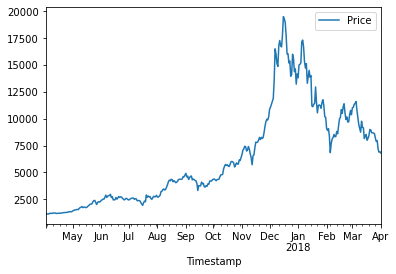

In [59]:
df.plot()

Behind the scenes, it's using <b>matplotlib.pyplot</b>'s interface. We can create a similar plt with the <b>plt.plot()</b> function:

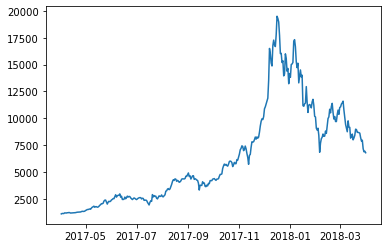

In [60]:
plt.plot(df.index,df['Price'])

<b>plt.plot()</b> accepts many params, but the first two are the most important: the values for X and Y axis: 

In [61]:
x = np.arange(-10,11)

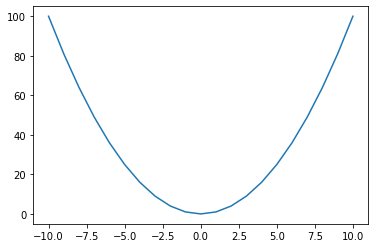

In [62]:
plt.plot(x,x**2)

Each <b>plt</b> function alters the global state. If you want to set the settings of your plot, you can use the <b>plt.figure</b> function. Others like <b>plt.title</b> keep altering the global plot:

Text(0.5, 1.0, 'My Nice Plot')

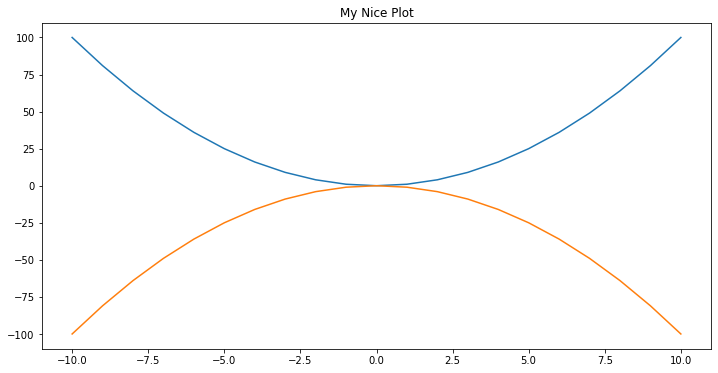

In [64]:
plt.figure(figsize=(12,6))
plt.plot(x, x**2)
plt.plot(x, -1 * (x **2))
plt.title('My Nice Plot')

Some of the arguments in <b>plt.figure</b> and <b>plt.plot</b> are available in the pandas <b>plot</b> interface:

<AxesSubplot:title={'center':'Bitcoin Price 2017-2018'}, xlabel='Timestamp'>

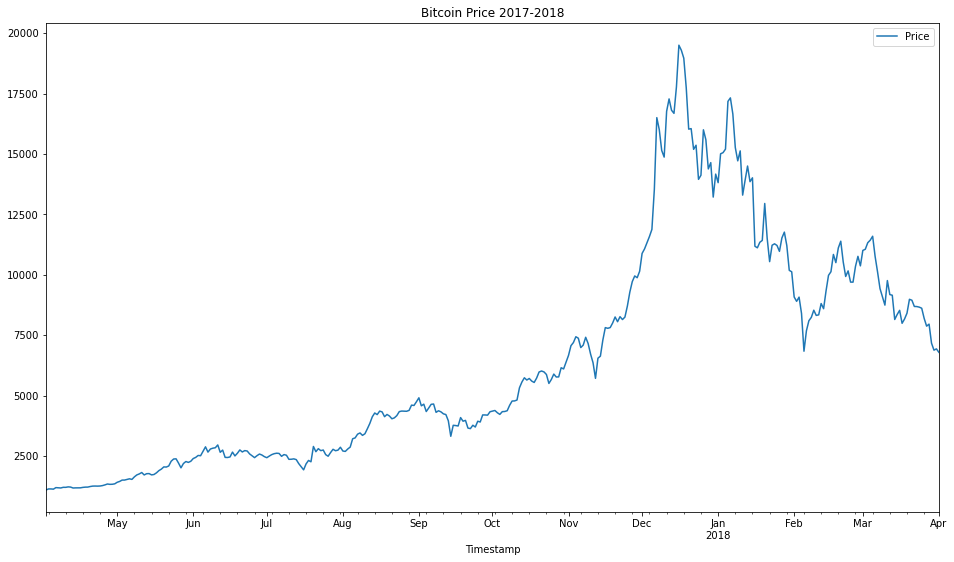

In [65]:
df.plot(figsize=(16,9), title='Bitcoin Price 2017-2018')

<h2>A More Challenging Parsing</h2>
<p>To demonstrate plotting two columns together, we'll try to add Ether prices to our 'df' DataFrame. The <b>eth-price.csv</b> file is ugly. We'll use Pandas to parse it.

In [77]:
dfE = pd.read_csv(
    'https://raw.githubusercontent.com/ine-rmotr-curriculum/freecodecamp-intro-to-pandas/master/data/eth-price.csv',
    header=None)

dfE.head()

0              1      2
0  Date(UTC)  UnixTimeStamp  Value
1   4/2/2017     1491091200  48.55
2   4/3/2017     1491177600  44.13
3   4/4/2017     1491264000  44.43
4   4/5/2017     1491350400  44.90

In [76]:
dfE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       363 non-null    object
 1   1       363 non-null    object
 2   2       363 non-null    object
dtypes: object(3)
memory usage: 8.6+ KB


<button onclick='window.location.href = "https://github.com/ine-rmotr-curriculum/freecodecamp-intro-to-pandas/blob/master/data/eth-price.csv";'>Parsing</button>